In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
trainDS = pd.read_csv('titanic_train.csv')

In [4]:
trainDS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

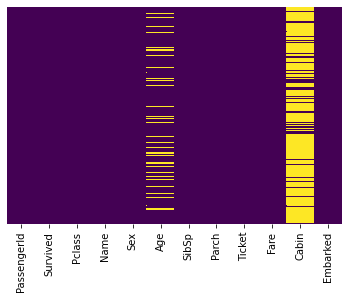

In [7]:
#check null inputs using heatmaps
sns.heatmap(trainDS.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

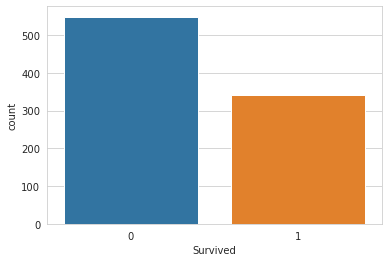

In [9]:
sns.countplot(x='Survived', data=trainDS)

<AxesSubplot:xlabel='Survived', ylabel='count'>

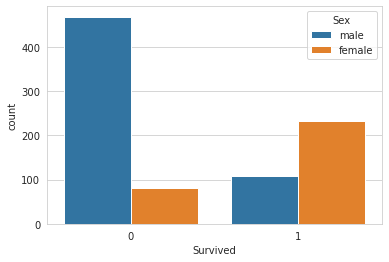

In [10]:
sns.countplot(x='Survived', hue='Sex', data=trainDS)

<AxesSubplot:xlabel='Survived', ylabel='count'>

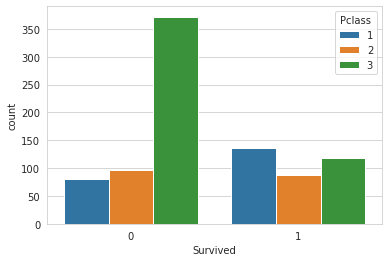

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=trainDS)

<AxesSubplot:xlabel='Age', ylabel='Count'>

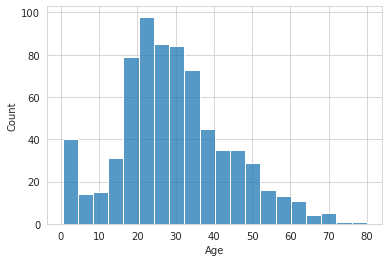

In [12]:
sns.histplot(trainDS['Age'].dropna())

<AxesSubplot:xlabel='Age', ylabel='Count'>

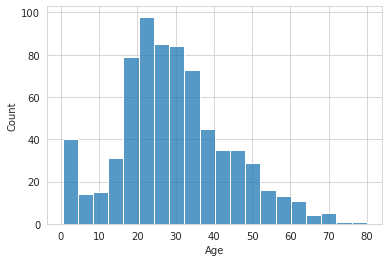

In [13]:
 sns.histplot(trainDS['Age'])

In [15]:
trainDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
import cufflinks as cf
cf.go_offline()

In [18]:
trainDS['Fare'].iplot(kind='hist', bins=30)

### clean data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

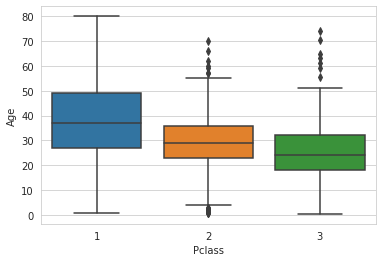

In [19]:
## chage age trends to class using boxplot
sns.boxplot(x='Pclass', y='Age', data=trainDS)

In [23]:
trainDS[trainDS['Pclass']==1]['Age'].mean()

38.233440860215055

In [24]:
trainDS[trainDS['Pclass']==2]['Age'].mean()

29.87763005780347

In [25]:
trainDS[trainDS['Pclass']==3]['Age'].mean()

25.14061971830986

In [26]:
def fix_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 30
        if Pclass == 3:
            return 25
    else:
        return Age

In [27]:
trainDS['Age'] = trainDS[['Age','Pclass']].apply(fix_age, axis=1)

<AxesSubplot:>

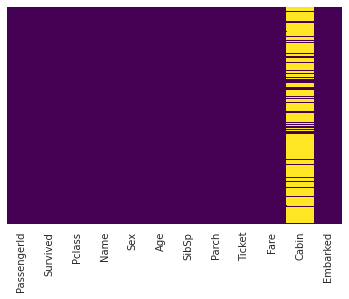

In [28]:
#check null inputs using heatmaps
sns.heatmap(trainDS.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [30]:
#drop cabin column
trainDS.drop('Cabin', axis=1, inplace=True)

In [31]:
trainDS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
